In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [8]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad['e cap - MgSO4'] = peakLoad['MgSO4 Salt Mass']*0.75
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad['e cap - MgCl2'] = peakLoad['MgCl2 Salt Mass']*0.193056
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad['e cap - K2CO3'] = peakLoad['K2CO3 Salt Mass']*0.186111
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad['e cap - SrBr2'] = peakLoad['SrBr2 Salt Mass']*0.3556
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

if size == 'Var_Size':
    for i in list(range(len(peakLoad['MgSO4 Salt Mass']))):
        peakLoad['MgSO4 Salt Mass'][i] = int(math.ceil(peakLoad['MgSO4 Salt Mass'][i]/25.0))*25
        peakLoad['MgCl2 Salt Mass'][i] = int(math.ceil(peakLoad['MgCl2 Salt Mass'][i]/25.0))*25
        peakLoad['K2CO3 Salt Mass'][i] = int(math.ceil(peakLoad['K2CO3 Salt Mass'][i]/25.0))*25
        peakLoad['SrBr2 Salt Mass'][i] = int(math.ceil(peakLoad['SrBr2 Salt Mass'][i]/25.0))*25
elif size == 'Fixed_Size':
    peakLoad['MgSO4 Salt Mass'] = 150
    peakLoad['MgCl2 Salt Mass'] = 150
    peakLoad['K2CO3 Salt Mass'] = 150
    peakLoad['SrBr2 Salt Mass'] = 150

peakLoad['e cap - MgSO4'] = peakLoad['MgSO4 Salt Mass']*0.75
peakLoad['e cap - MgCl2'] = peakLoad['MgCl2 Salt Mass']*0.193056
peakLoad['e cap - K2CO3'] = peakLoad['K2CO3 Salt Mass']*0.186111
peakLoad['e cap - SrBr2'] = peakLoad['SrBr2 Salt Mass']*0.3556

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,e cap - MgSO4,MgCl2 Salt Mass,e cap - MgCl2,K2CO3 Salt Mass,e cap - K2CO3,SrBr2 Salt Mass,e cap - SrBr2
0,1,27.724174,58015.584978,0.238881,98.568777,73.926583,327.059854,63.140867,148.965802,27.724174,77.964495,27.724174
1,2,20.164945,41411.346548,0.234433,71.693170,53.769878,237.884232,45.924978,108.349022,20.164945,56.706819,20.164945
2,3,18.771555,36953.435376,0.224725,66.739200,50.054400,221.446522,42.751580,100.862146,18.771555,52.788400,18.771555
3,4,16.617412,31673.736508,0.217586,59.080496,44.310372,196.034272,37.845593,89.287640,16.617412,46.730630,16.617412
4,5,27.902137,59150.390389,0.242000,99.201496,74.401122,329.159269,63.546172,149.922022,27.902137,78.464953,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,32.503509,143.799328,27.761323,65.496214,12.189566,34.278869,12.189566
396,397,12.662940,24918.728631,0.224640,45.021018,33.765763,149.383689,28.839417,68.039720,12.662940,35.610069,12.662940
397,398,4.833286,7854.976581,0.185523,17.183958,12.887969,57.017881,11.007644,25.969908,4.833286,13.591917,4.833286
398,399,14.577960,28841.437895,0.225848,51.829559,38.872169,171.975025,33.200810,78.329386,14.577960,40.995389,14.577960


In [9]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_MgSO4 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
cost_MgCl2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
cost_K2CO3 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
cost_SrBr2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_MgSO4 = cost_MgSO4.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4 = cost_MgSO4.sort_values(by=['building id'])
cost_MgSO4 = cost_MgSO4.reset_index()
cost_MgSO4 = cost_MgSO4[['building id', 'total cost ($)']]

cost_MgCl2 = cost_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
cost_MgCl2 = cost_MgCl2.sort_values(by=['building id'])
cost_MgCl2 = cost_MgCl2.reset_index()
cost_MgCl2 = cost_MgCl2[['building id', 'total cost ($)']]

cost_K2CO3 = cost_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
cost_K2CO3 = cost_K2CO3.sort_values(by=['building id'])
cost_K2CO3 = cost_K2CO3.reset_index()
cost_K2CO3 = cost_K2CO3[['building id', 'total cost ($)']]

cost_SrBr2 = cost_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
cost_SrBr2 = cost_SrBr2.sort_values(by=['building id'])
cost_SrBr2 = cost_SrBr2.reset_index()
cost_SrBr2 = cost_SrBr2[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - MgSO4'] = cost_MgSO4['total cost ($)']
cost_impacts_TES['total cost - MgCl2'] = cost_MgCl2['total cost ($)']
cost_impacts_TES['total cost - K2CO3'] = cost_K2CO3['total cost ($)']
cost_impacts_TES['total cost - SrBr2'] = cost_SrBr2['total cost ($)']

cost_impacts_TES['cost saving - MgSO4'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgSO4']
cost_impacts_TES['cost saving % - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - MgCl2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgCl2']
cost_impacts_TES['cost saving % - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - K2CO3'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - K2CO3']
cost_impacts_TES['cost saving % - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - SrBr2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - SrBr2']
cost_impacts_TES['cost saving % - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - K2CO3,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2
0,1,3526.290877,3411.853730,3421.667666,3465.153973,3466.088070,114.437147,0.032453,104.623211,0.029669,61.136904,0.017337,60.202807,0.017073
1,2,2523.385394,2439.361398,2446.430117,2478.064695,2478.750342,84.023996,0.033298,76.955277,0.030497,45.320699,0.017960,44.635052,0.017689
2,3,2254.533101,2175.504185,2182.354188,2212.550478,2213.221329,79.028916,0.035053,72.178913,0.032015,41.982623,0.018621,41.311773,0.018324
3,4,1938.359969,1868.762140,1874.672865,1900.996197,1901.580105,69.597829,0.035906,63.687104,0.032856,37.363772,0.019276,36.779864,0.018975
4,5,3591.834993,3476.731842,3486.818524,3531.145281,3532.079962,115.103151,0.032046,105.016469,0.029238,60.689712,0.016897,59.755031,0.016636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1391.556349,1410.631561,1410.867715,49.592401,0.034513,45.363774,0.031570,26.288562,0.018295,26.052408,0.018131
396,397,1535.499790,1487.147655,1491.225089,1509.435847,1509.701162,48.352134,0.031490,44.274701,0.028834,26.063943,0.016974,25.798628,0.016801
397,398,491.584576,473.586949,475.106841,481.862989,482.004724,17.997627,0.036611,16.477736,0.033520,9.721587,0.019776,9.579853,0.019488
398,399,1766.304961,1707.027850,1712.075523,1734.692888,1735.172304,59.277111,0.033560,54.229438,0.030702,31.612073,0.017897,31.132656,0.017626


In [10]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()
diff_all_cost_MgSO4 = cost_impacts_TES["cost saving - MgSO4"].sum()
diff_all_cost_MgCl2 = cost_impacts_TES["cost saving - MgCl2"].sum()
diff_all_cost_K2CO3 = cost_impacts_TES["cost saving - K2CO3"].sum()
diff_all_cost_SrBr2 = cost_impacts_TES["cost saving - SrBr2"].sum()

pct_cost_saving_MgSO4 = diff_all_cost_MgSO4/tot_cost_noTES
pct_cost_saving_MgCl2 = diff_all_cost_MgCl2/tot_cost_noTES
pct_cost_saving_K2CO3 = diff_all_cost_K2CO3/tot_cost_noTES
pct_cost_saving_SrBr2 = diff_all_cost_SrBr2/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9

cost_impacts_TES['saving per kg - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['MgSO4 Salt Mass']
cost_impacts_TES['saving per kg - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['MgCl2 Salt Mass']
cost_impacts_TES['saving per kg - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['K2CO3 Salt Mass']
cost_impacts_TES['saving per kg - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['SrBr2 Salt Mass']

cost_impacts_TES['saving per kWh - MgSO4'] = cost_impacts_TES['saving per kg - MgSO4']*20*0.75
cost_impacts_TES['saving per kWh - MgCl2'] = cost_impacts_TES['saving per kg - MgCl2']*20*0.193056
cost_impacts_TES['saving per kWh - K2CO3'] = cost_impacts_TES['saving per kg - K2CO3']*20*0.186111
cost_impacts_TES['saving per kWh - SrBr2'] = cost_impacts_TES['saving per kg - SrBr2']*20*0.3556

cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,...,e cap - SrBr2,saving per kg - MgSO4,saving per kg - MgCl2,saving per kg - K2CO3,saving per kg - SrBr2,saving per kWh - MgSO4,saving per kWh - MgCl2,saving per kWh - K2CO3,saving per kWh - SrBr2,peak load
0,1,3526.290877,3411.853730,3421.667666,3465.153973,3466.088070,114.437147,0.032453,104.623211,0.029669,...,27.724174,1.160988,0.319890,0.410409,0.772182,17.414817,1.235134,1.527633,5.491761,27.724174
1,2,2523.385394,2439.361398,2446.430117,2478.064695,2478.750342,84.023996,0.033298,76.955277,0.030497,...,20.164945,1.171994,0.323499,0.418284,0.787120,17.579916,1.249068,1.556946,5.597995,20.164945
2,3,2254.533101,2175.504185,2182.354188,2212.550478,2213.221329,79.028916,0.035053,72.178913,0.032015,...,18.771555,1.184145,0.325943,0.416238,0.782592,17.762181,1.258504,1.549328,5.565793,18.771555
3,4,1938.359969,1868.762140,1874.672865,1900.996197,1901.580105,69.597829,0.035906,63.687104,0.032856,...,16.617412,1.178017,0.324877,0.418465,0.787061,17.670255,1.254391,1.557620,5.597579,16.617412
4,5,3591.834993,3476.731842,3486.818524,3531.145281,3532.079962,115.103151,0.032046,105.016469,0.029238,...,27.902137,1.160297,0.319045,0.404809,0.761551,17.404448,1.231869,1.506786,5.416148,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1391.556349,1410.631561,1410.867715,49.592401,0.034513,45.363774,0.031570,...,12.189566,1.144316,0.315466,0.401375,0.760014,17.164747,1.218051,1.494007,5.405217,12.189566
396,397,1535.499790,1487.147655,1491.225089,1509.435847,1509.701162,48.352134,0.031490,44.274701,0.028834,...,12.662940,1.073990,0.296382,0.383070,0.724476,16.109854,1.144368,1.425869,5.152471,12.662940
397,398,491.584576,473.586949,475.106841,481.862989,482.004724,17.997627,0.036611,16.477736,0.033520,...,4.833286,1.047350,0.288992,0.374340,0.704820,15.710257,1.115834,1.393377,5.012679,4.833286
398,399,1766.304961,1707.027850,1712.075523,1734.692888,1735.172304,59.277111,0.033560,54.229438,0.030702,...,14.577960,1.143693,0.315333,0.403579,0.759418,17.155397,1.217539,1.502209,5.400984,14.577960


In [11]:
cost_impacts_TES.min()

building id                  1.000000
total cost - no TES        280.292317
total cost - MgSO4         269.204534
total cost - MgCl2         270.136040
total cost - K2CO3         274.261595
total cost - SrBr2         274.355148
cost saving - MgSO4         11.087784
cost saving % - MgSO4        0.027369
cost saving - MgCl2         10.156278
cost saving % - MgCl2        0.025066
cost saving - K2CO3          6.030722
cost saving % - K2CO3        0.014819
cost saving - SrBr2          5.937169
cost saving % - SrBr2        0.014628
Peak Load                    2.931349
Load                      4494.552000
Load Factor                  0.164414
MgSO4 Salt Mass             10.421934
e cap - MgSO4                7.816450
MgCl2 Salt Mass             34.580891
e cap - MgCl2                6.676049
K2CO3 Salt Mass             15.750543
e cap - K2CO3                2.931349
SrBr2 Salt Mass              8.243389
e cap - SrBr2                2.931349
saving per kg - MgSO4        1.023690
saving per k

In [12]:
cost_impacts_TES.max()

building id                 400.000000
total cost - no TES        3866.092793
total cost - MgSO4         3736.558056
total cost - MgCl2         3747.818042
total cost - K2CO3         3797.200171
total cost - SrBr2         3798.263047
cost saving - MgSO4         129.534737
cost saving % - MgSO4         0.046018
cost saving - MgCl2         118.274752
cost saving % - MgCl2         0.041999
cost saving - K2CO3          68.892622
cost saving % - K2CO3         0.025008
cost saving - SrBr2          67.829746
cost saving % - SrBr2         0.024675
Peak Load                    30.477053
Load                      63936.968704
Load Factor                   0.280478
MgSO4 Salt Mass             108.356189
e cap - MgSO4                81.267142
MgCl2 Salt Mass             359.535345
e cap - MgCl2                69.410456
K2CO3 Salt Mass             163.757399
e cap - K2CO3                30.477053
SrBr2 Salt Mass              85.705999
e cap - SrBr2                30.477053
saving per kg - MgSO4    

In [7]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset


,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,saving per kg - MgSO4,saving per kg - MgCl2,saving per kg - K2CO3,saving per kg - SrBr2,saving per kWh - MgSO4,saving per kWh - MgCl2,saving per kWh - K2CO3,saving per kWh - SrBr2,peak load,building
0,304,305,280.292317,269.204534,270.136040,274.261595,274.355148,11.087784,0.039558,10.156278,...,1.063889,0.293696,0.382890,0.720234,1.418519,1.521301,2.057320,2.025405,2.931349,1
1,210,211,320.706929,306.432181,307.572287,312.843172,312.941481,14.274748,0.044510,13.134642,...,1.228653,0.340715,0.447861,0.845025,1.638203,1.764850,2.406420,2.376336,3.267824,2
2,233,234,302.507901,288.808238,289.909399,294.942789,295.043609,13.699663,0.045287,12.598502,...,1.155094,0.320139,0.422061,0.795680,1.540125,1.658269,2.267793,2.237570,3.335892,3
3,338,339,351.177610,336.725184,337.897745,343.190938,343.297598,14.452427,0.041154,13.279865,...,1.214824,0.336417,0.444213,0.837417,1.619765,1.742589,2.386817,2.354942,3.346160,4
4,99,100,439.196709,421.669956,423.121892,429.734957,429.833528,17.526753,0.039906,16.074817,...,1.106277,0.305788,0.395172,0.747185,1.475036,1.583934,2.123316,2.101196,4.456120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,3356.766936,3366.136940,3407.707440,3408.624091,109.467525,0.031581,100.097522,...,1.126133,0.310342,0.398395,0.749286,1.501511,1.607521,2.140631,2.107104,27.341019,396
396,0,1,3526.290877,3411.853730,3421.667666,3465.153973,3466.088070,114.437147,0.032453,104.623211,...,1.160988,0.319890,0.410409,0.772182,1.547984,1.656981,2.205184,2.171491,27.724174,397
397,4,5,3591.834993,3476.731842,3486.818524,3531.145281,3532.079962,115.103151,0.032046,105.016469,...,1.160297,0.319045,0.404809,0.761551,1.547062,1.652601,2.175092,2.141593,27.902137,398
398,399,400,3539.585834,3424.820699,3434.699763,3478.818851,3479.436533,114.765136,0.032423,104.886071,...,1.136150,0.312936,0.398058,0.752833,1.514867,1.620960,2.138819,2.117079,28.411462,399


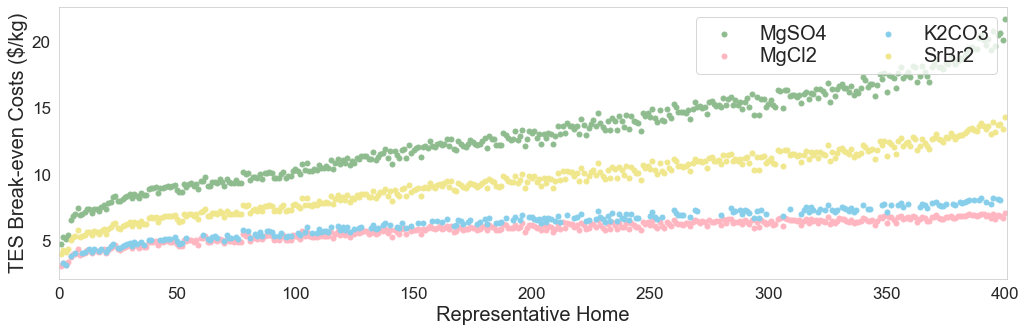

In [41]:

fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - MgSO4']*20, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='MgSO4')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - MgCl2']*20, marker='o', ms=5, linestyle='',color = 'lightpink', label='MgCl2')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - K2CO3']*20, marker='o', ms=5, linestyle='',color = 'skyblue', label='K2CO3')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - SrBr2']*20, marker='o', ms=5, linestyle='',color = 'khaki', label='SrBr2')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("TES Break-even Costs ($/kg)", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, ncol=2,handleheight=0.5, labelspacing=0.15, loc='upper right')
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kg_opt.png', dpi=300, bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kg_var.png', dpi=300, bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kg_fixed.png', dpi=300, bbox_inches='tight')

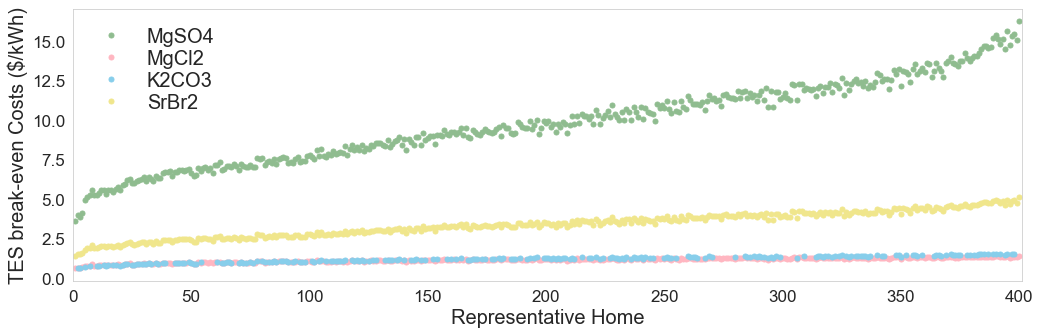

In [42]:

fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - MgSO4']*0.75*20, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='MgSO4')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - MgCl2']*20*0.193056, marker='o', ms=5, linestyle='',color = 'lightpink', label='MgCl2')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - K2CO3']*20*0.186111, marker='o', ms=5, linestyle='',color = 'skyblue', label='K2CO3')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - SrBr2']*20*0.3556, marker='o', ms=5, linestyle='',color = 'khaki', label='SrBr2')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("TES break-even Costs ($/kWh)", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
if size == 'Opt_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kwh_opt.png', dpi=300, bbox_inches='tight')
elif size == 'Var_Size':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kWh_var.png', dpi=300, bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/break_even_kWh_fixed.png', dpi=300, bbox_inches='tight')


,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,...,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,saving per kg - MgSO4,saving per kg - MgCl2,saving per kg - SrBr2
0,146,147,628.282405,606.522568,608.357395,616.572235,21.759837,0.034634,19.925010,0.031713,...,5.978694,10121.072677,0.193248,21.256271,70.530173,32.124346,16.812976,1.023690,0.282503,0.696496
1,367,368,971.439271,935.076176,938.143522,952.054507,36.363094,0.037432,33.295748,0.034275,...,9.824847,15520.220534,0.180330,34.930640,115.902930,52.790255,27.628929,1.041009,0.287273,0.701611
2,164,165,452.614536,434.305653,435.879656,442.930786,18.308884,0.040451,16.734880,0.036974,...,4.939358,7216.226771,0.166777,17.561082,58.269211,26.539851,13.890209,1.042583,0.287199,0.697164
3,329,330,756.058500,730.522427,732.684135,742.282635,25.536074,0.033775,23.374365,0.030916,...,6.881045,12137.570453,0.201360,24.464433,81.175135,36.972802,19.350521,1.043804,0.287950,0.711912
4,397,398,491.584576,473.586949,475.106841,482.004724,17.997627,0.036611,16.477736,0.033520,...,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917,1.047350,0.288992,0.704820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,210,211,320.706929,306.432181,307.572287,312.941481,14.274748,0.044510,13.134642,0.040955,...,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606,1.228653,0.340715,0.845025
396,348,349,1230.560090,1185.982672,1189.812168,1207.118158,44.577418,0.036225,40.747922,0.033113,...,10.200283,20156.985129,0.225585,36.265440,120.331912,54.807521,28.684709,1.229198,0.338629,0.817227
397,392,393,887.219514,850.784344,853.851783,867.874503,36.435170,0.041067,33.367732,0.037609,...,8.311667,14431.856939,0.198212,29.550774,98.052061,44.659727,23.373640,1.232968,0.340306,0.827642
398,378,379,1329.775466,1276.516386,1281.091380,1301.737010,53.259080,0.040051,48.684086,0.036611,...,12.113572,21830.926390,0.205729,43.067826,142.902828,65.087886,34.065162,1.236633,0.340680,0.823083


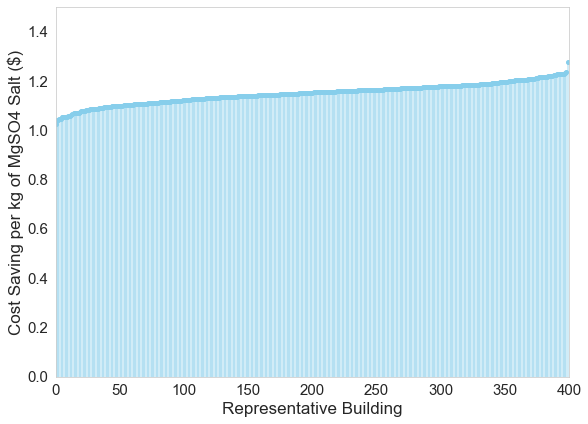

In [9]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='saving per kg - MgSO4')
#ordered_cost = cost_impacts_TES.sort_values(by='Peak Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['saving per kg - MgSO4'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving per kg of MgSO4 Salt ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,1.5)
plt.xlim(0,400)
#ax.patch.set_edgecolor('black')


(0.0, 400.0)

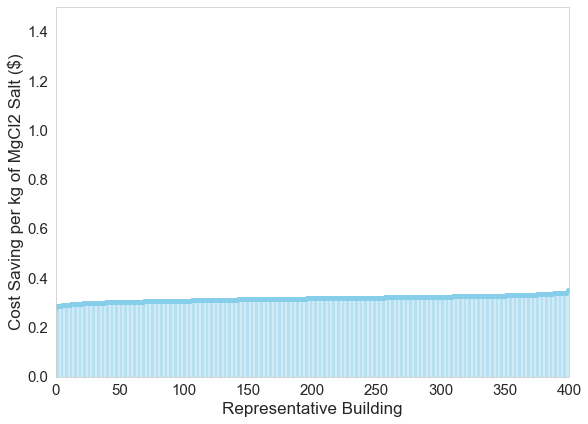

In [10]:
# Graph cost saving due to TES - MgCl2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='saving per kg - MgCl2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['saving per kg - MgCl2'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving per kg of MgCl2 Salt ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,1.5)
plt.xlim(0,400)


(0.0, 400.0)

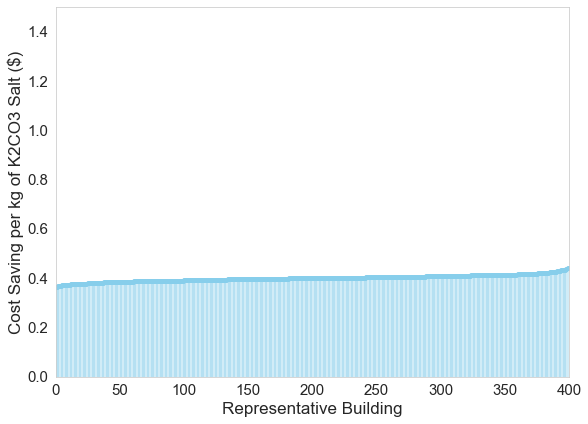

In [21]:
# Graph cost saving due to TES - K2CO3:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='saving per kg - K2CO3')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['saving per kg - K2CO3'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving per kg of K2CO3 Salt ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,1.5)
plt.xlim(0,400)

(0.0, 400.0)

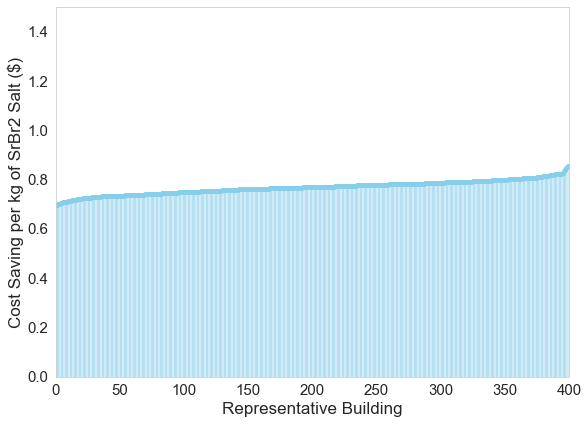

In [11]:
# Graph cost saving due to TES - SrBr2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='saving per kg - SrBr2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['saving per kg - SrBr2'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving per kg of SrBr2 Salt ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,1.5)
plt.xlim(0,400)

In [25]:
cost_impacts_TES.min()

building id                 1.000000
total cost - no TES       279.896444
total cost - MgSO4        268.409223
total cost - MgCl2        269.389860
total cost - K2CO3        273.977744
total cost - SrBr2        273.992065
cost saving - MgSO4        11.487221
cost saving % - MgSO4       0.029265
cost saving - MgCl2        10.506584
cost saving % - MgCl2       0.026766
cost saving - K2CO3         5.918700
cost saving % - K2CO3       0.014878
cost saving - SrBr2         5.904379
cost saving % - SrBr2       0.014939
Peak Load                   2.931349
Load                     4494.552000
Load Factor                 0.164414
MgSO4 Salt Mass            10.421934
MgCl2 Salt Mass            34.580891
K2CO3 Salt Mass            15.750543
SrBr2 Salt Mass             8.243389
saving per kg - MgSO4       1.064294
saving per kg - MgCl2       0.293884
saving per kg - K2CO3       0.362988
saving per kg - SrBr2       0.692287
dtype: float64

In [26]:
cost_impacts_TES.mean()

building id                200.500000
total cost - no TES       1472.574929
total cost - MgSO4        1420.490996
total cost - MgCl2        1424.864774
total cost - K2CO3        1445.676493
total cost - SrBr2        1445.692125
cost saving - MgSO4         52.083933
cost saving % - MgSO4        0.036353
cost saving - MgCl2         47.710155
cost saving % - MgCl2        0.033301
cost saving - K2CO3         26.898436
cost saving % - K2CO3        0.018783
cost saving - SrBr2         26.882804
cost saving % - SrBr2        0.018770
Peak Load                   12.540729
Load                     24133.367158
Load Factor                  0.214600
MgSO4 Salt Mass             44.586517
MgCl2 Salt Mass            147.941975
K2CO3 Salt Mass             67.383064
SrBr2 Salt Mass             35.266393
saving per kg - MgSO4        1.168355
saving per kg - MgCl2        0.322556
saving per kg - K2CO3        0.399406
saving per kg - SrBr2        0.762609
dtype: float64

In [27]:
cost_impacts_TES.max()

building id                400.000000
total cost - no TES       3850.323382
total cost - MgSO4        3718.653522
total cost - MgCl2        3729.672282
total cost - K2CO3        3782.720577
total cost - SrBr2        3782.912201
cost saving - MgSO4        131.669861
cost saving % - MgSO4        0.047366
cost saving - MgCl2        120.651101
cost saving % - MgCl2        0.043473
cost saving - K2CO3         67.602806
cost saving % - K2CO3        0.024722
cost saving - SrBr2         67.411181
cost saving % - SrBr2        0.024679
Peak Load                   30.477053
Load                     63936.968704
Load Factor                  0.280478
MgSO4 Salt Mass            108.356189
MgCl2 Salt Mass            359.535345
K2CO3 Salt Mass            163.757399
SrBr2 Salt Mass             85.705999
saving per kg - MgSO4        1.270532
saving per kg - MgCl2        0.351608
saving per kg - K2CO3        0.441544
saving per kg - SrBr2        0.841774
dtype: float64